In [1]:
import pandas as pd
# pandas allow you to take in data in a certain structure
df = pd.read_csv("Dry_Bean_Dataset.csv")
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860154,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [2]:
df.info()
#this gives all the non null columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

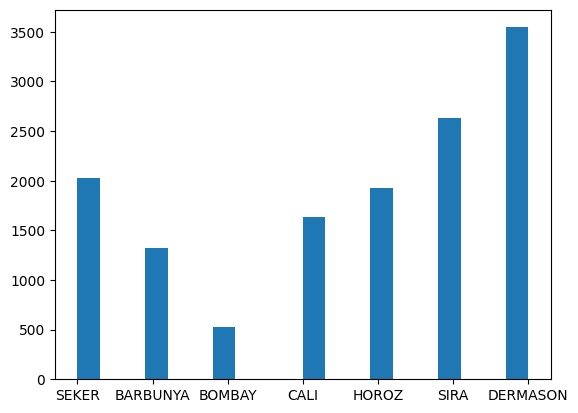

In [3]:
import matplotlib.pyplot as plt
target_column = df["Class"]
plt.hist(target_column , bins=20)
#hist creats  a histogram of the data, with 20 bins between the minimum and maximum values in the target column. The "bins" parameter
plt.show()

In [ ]:
#assignment - 

In [5]:
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.preprocessing import OneHotEncoder, LabelEncoder

from sklearn.impute import SimpleImputer

from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline

from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt

from sklearn.tree import plot_tree

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [21]:
# Function for data preprocessing
def preprocess_data(data, target_column):
    # Separating features and target variable
    X = data.drop(columns=[target_column])
    y = data[target_column]
    
    print(X)
    print(y)
    
    # Handling missing values
    numerical_cols = X.select_dtypes(include=['number']).columns
    categorical_cols = X.select_dtypes(include=['object']).columns
    numerical_transformer = SimpleImputer(strategy='mean')  # Impute missing values with mean
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with most frequent value
        ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical variables
    ])
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_cols),
            ('cat', categorical_transformer, categorical_cols)
        ])
    
    # Splitting the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Preprocessing pipeline
    preprocess_pipeline = Pipeline(steps=[('preprocessor', preprocessor)])
    
    # Preprocessing training and testing data
    X_train_preprocessed = preprocess_pipeline.fit_transform(X_train)
    X_test_preprocessed = preprocess_pipeline.transform(X_test)
    
    return X_train_preprocessed, X_test_preprocessed,y_train,y_test


In [20]:
preprocess_data(df, target_column="Class")


(array([[2.90760000e+04, 6.36353000e+02, 2.35061517e+02, ...,
         2.23867000e-03, 6.70010659e-01, 9.96583653e-01],
        [3.80910000e+04, 7.55186000e+02, 2.71077683e+02, ...,
         1.91223400e-03, 6.60001563e-01, 9.95297595e-01],
        [3.09690000e+04, 6.51527000e+02, 2.30164083e+02, ...,
         2.53988800e-03, 7.44324294e-01, 9.96583939e-01],
        ...,
        [9.00040000e+04, 1.15659900e+03, 4.56836383e+02, ...,
         9.44017000e-04, 5.49098885e-01, 9.94035335e-01],
        [3.84260000e+04, 7.11412000e+02, 2.46696608e+02, ...,
         2.55938500e-03, 8.03912792e-01, 9.98825538e-01],
        [6.36280000e+04, 9.97390000e+02, 4.00784151e+02, ...,
         9.88363000e-04, 5.04356140e-01, 9.90707337e-01]]),
 array([[4.23390000e+04, 7.41226000e+02, 2.60199330e+02, ...,
         2.40337800e-03, 7.96229686e-01, 9.99382735e-01],
        [6.82470000e+04, 1.08875400e+03, 3.70368146e+02, ...,
         1.34333000e-03, 6.33470550e-01, 9.86351522e-01],
        [3.78560000e+04, 

In [26]:
X_train,X_test,y_train,y_test=preprocess_data(df,target_column="Class")

        Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0      28395    610.291       208.178117       173.888747      1.197191   
1      28734    638.018       200.524796       182.734419      1.097356   
2      29380    624.110       212.826130       175.931143      1.209713   
3      30008    645.884       210.557999       182.516516      1.153638   
4      30140    620.134       201.847882       190.279279      1.060798   
...      ...        ...              ...              ...           ...   
13606  42097    759.696       288.721612       185.944705      1.552728   
13607  42101    757.499       281.576392       190.713136      1.476439   
13608  42139    759.321       281.539928       191.187979      1.472582   
13609  42147    763.779       283.382636       190.275731      1.489326   
13610  42159    772.237       295.142741       182.204716      1.619841   

       Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0          0.54981

In [22]:
# Function for building the decision tree classifier
def build_decision_tree(X_train, y_train, max_depth=None):
    classifier = DecisionTreeClassifier()
    classifier.fit(X_train, y_train)
    return(classifier)


In [27]:
classfier = build_decision_tree(X_train,y_train)

In [31]:
classfier

DecisionTreeClassifier()

In [29]:
# Function for evaluating the model
def evaluate_model(classifier, X_test, y_test):
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred)


    cm = confusion_matrix(y_test, y_pred, labels=classifier.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classifier.classes_)
    disp.plot()
    plt.plot()
    return accuracy, report,confusion_mat

(1.0,
 '              precision    recall  f1-score   support\n\n    BARBUNYA       1.00      1.00      1.00      1061\n      BOMBAY       1.00      1.00      1.00       405\n        CALI       1.00      1.00      1.00      1313\n    DERMASON       1.00      1.00      1.00      2875\n       HOROZ       1.00      1.00      1.00      1520\n       SEKER       1.00      1.00      1.00      1614\n        SIRA       1.00      1.00      1.00      2100\n\n    accuracy                           1.00     10888\n   macro avg       1.00      1.00      1.00     10888\nweighted avg       1.00      1.00      1.00     10888\n',
 array([[1061,    0,    0,    0,    0,    0,    0],
        [   0,  405,    0,    0,    0,    0,    0],
        [   0,    0, 1313,    0,    0,    0,    0],
        [   0,    0,    0, 2875,    0,    0,    0],
        [   0,    0,    0,    0, 1520,    0,    0],
        [   0,    0,    0,    0,    0, 1614,    0],
        [   0,    0,    0,    0,    0,    0, 2100]], dtype=int64))

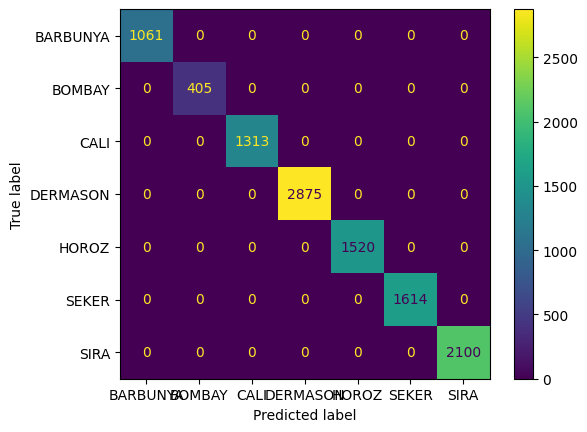

In [33]:
evaluate_model(classfier, X_train, y_train)

In [34]:
def visualize_tree(classifier, feature_names):
    plt.figure(figsize=(15, 10))
    plot_tree(classifier, feature_names=feature_names,class_names=classifier.classes_, filled=True)
    plt.show()


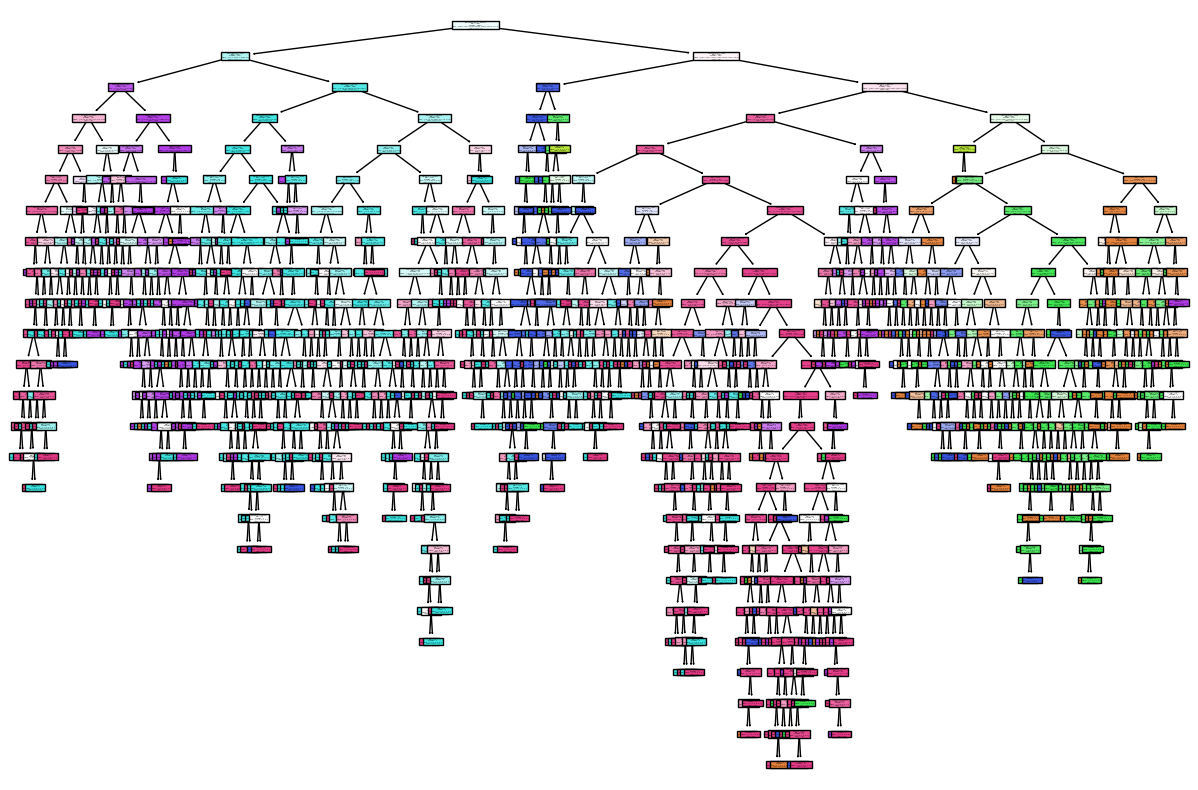

In [35]:
visualize_tree(classfier, df.columns[:-1])